In [5]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [6]:
df_DA_PL = df[(df['job_country'] == 'Poland') & (df['job_title_short'] == 'Data Analyst')].copy()

In [11]:
df_DA_PL['job_location'] = df_DA_PL['job_location'].replace('Poland', 'Anywhere')

C:\Users\iamma\AppData\Local\Temp\ipykernel_10568\3839539805.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, x='count', y='job_location', palette='dark:b_r', legend=False)


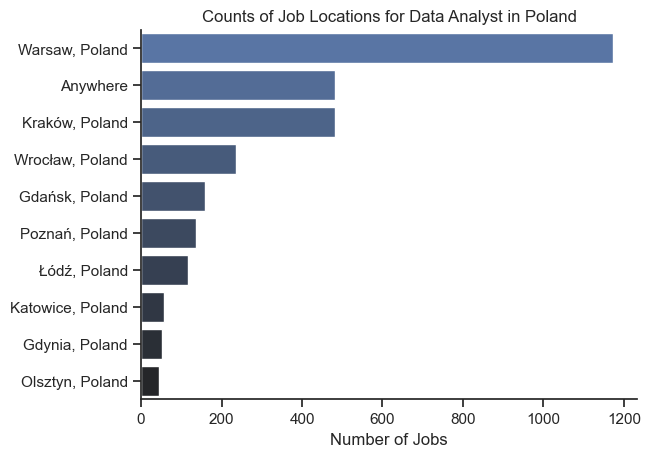

In [13]:
df_plot = df_DA_PL['job_location'].value_counts().head(10).reset_index()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Job Locations for Data Analyst in Poland')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

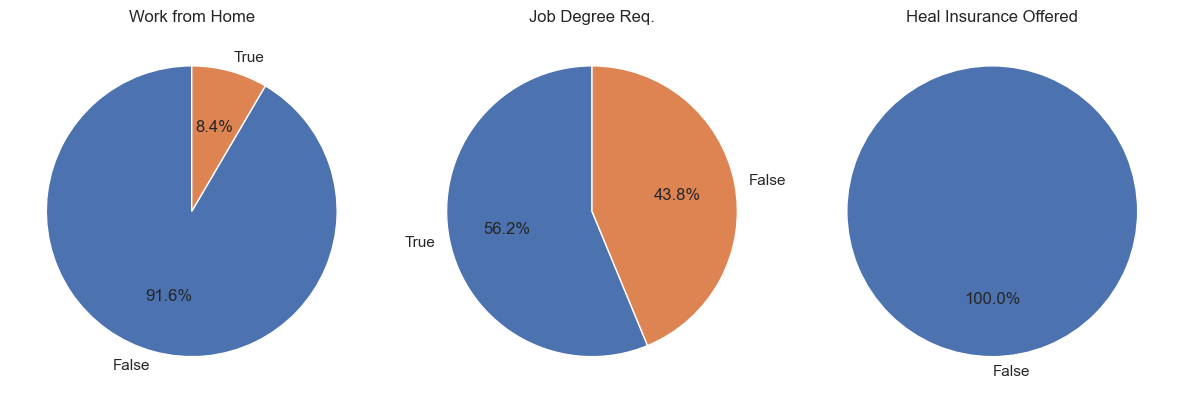

In [20]:
dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Heal Insurance Offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):

    counts = df_DA_PL[column].value_counts()
    
    labels = counts.index.map({True: 'True', False: 'False'})
    
    ax[i].pie(counts, startangle=90, autopct='%1.1f%%', labels=labels)
    ax[i].set_title(title)

plt.tight_layout()
plt.show()

C:\Users\iamma\AppData\Local\Temp\ipykernel_10568\2855163957.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, x='count', y='company_name', palette='dark:b_r', legend=False)


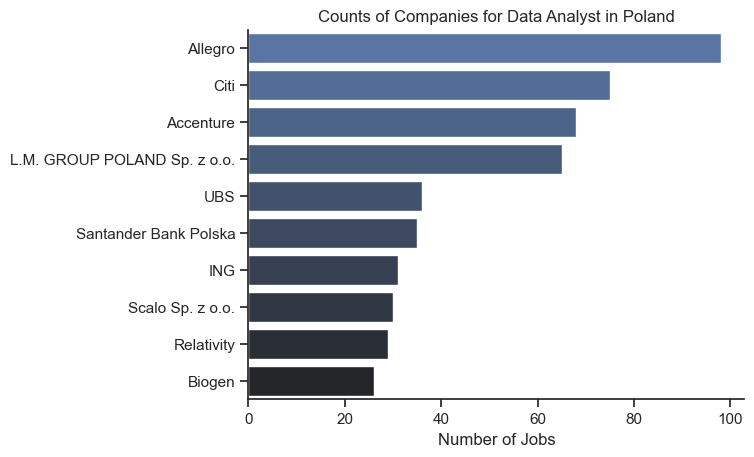

In [19]:
df_plot = df_DA_PL['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Companies for Data Analyst in Poland')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()